# Setup

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
training = pd.read_csv('playground-series-s5e12/train.csv', index_col='id')
testing = pd.read_csv('playground-series-s5e12/test.csv', index_col='id')

training.head(5)

age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
id                                                                          
0    31                             1                                  45   
1    50                             2                                  73   
2    32                             3                                 158   
3    54                             3                                  77   
4    54                             1                                  55   

    diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
id                                                                     
0          7.7                  6.8                        6.1  33.4   
1          5.7                  6.5                        5.8  23.8   
2          8.5                  7.4                        9.1  24.1   
3          4.6                  7.0                        9.2  26.6   
4          5.7                  6.2                        5.1  28.8   

    waist_to_hip_ratio  systolic_bp  diastolic_bp  ...  gender  ethnicity  \
id                                                 ...                      
0                 0.93          112            70  ...  Female   Hispanic   
1                 0.83          120            77  ...  Female      White   
2                 0.83           95            89  ...    Male   Hispanic   
3                 0.83          121            69  ...  Female      White   
4                 0.90          108            60  ...    Male      White   

    education_level  income_level  smoking_status employment_status  \
id                                                                    
0        Highschool  Lower-Middle         Current          Employed   
1        Highschool  Upper-Middle           Never          Employed   
2        Highschool  Lower-Middle           Never           Retired   
3        Highschool  Lower-Middle         Current          Employed   
4        Highschool  Upper-Middle           Never           Retired   

   family_history_diabetes hypertension_history cardiovascular_history  \
id                                                                       
0                        0                    0                      0   
1                        0                    0                      0   
2                        0                    0                      0   
3                        0                    1                      0   
4                        0                    1                      0   

   diagnosed_diabetes  
id                     
0                 1.0  
1                 1.0  
2                 0.0  
3                 1.0  
4                 1.0  

[5 rows x 25 columns]

# EDA

In [5]:
training.shape

(700000, 25)

In [6]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 0 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  int64  
 1   alcohol_consumption_per_week        700000 non-null  int64  
 2   physical_activity_minutes_per_week  700000 non-null  int64  
 3   diet_score                          700000 non-null  float64
 4   sleep_hours_per_day                 700000 non-null  float64
 5   screen_time_hours_per_day           700000 non-null  float64
 6   bmi                                 700000 non-null  float64
 7   waist_to_hip_ratio                  700000 non-null  float64
 8   systolic_bp                         700000 non-null  int64  
 9   diastolic_bp                        700000 non-null  int64  
 10  heart_rate                          700000 non-null  int64  
 11  cholesterol_total              

age  alcohol_consumption_per_week  \
count   700000.000000                 700000.000000   
unique            NaN                           NaN   
top               NaN                           NaN   
freq              NaN                           NaN   
mean        50.359734                      2.072411   
std         11.655520                      1.048189   
min         19.000000                      1.000000   
25%         42.000000                      1.000000   
50%         50.000000                      2.000000   
75%         58.000000                      3.000000   
max         89.000000                      9.000000   

        physical_activity_minutes_per_week     diet_score  \
count                        700000.000000  700000.000000   
unique                                 NaN            NaN   
top                                    NaN            NaN   
freq                                   NaN            NaN   
mean                             80.230803       5.963695   
std                              51.195071       1.463336   
min                               1.000000       0.100000   
25%                              49.000000       5.000000   
50%                              71.000000       6.000000   
75%                              96.000000       7.000000   
max                             747.000000       9.900000   

        sleep_hours_per_day  screen_time_hours_per_day            bmi  \
count         700000.000000              700000.000000  700000.000000   
unique                  NaN                        NaN            NaN   
top                     NaN                        NaN            NaN   
freq                    NaN                        NaN            NaN   
mean               7.002200                   6.012733      25.874684   
std                0.901907                   2.022707       2.860705   
min                3.100000                   0.600000      15.100000   
25%                6.400000                   4.600000      23.900000   
50%                7.000000                   6.000000      25.900000   
75%                7.600000                   7.400000      27.800000   
max                9.900000                  16.500000      38.400000   

        waist_to_hip_ratio    systolic_bp   diastolic_bp  ...  gender  \
count        700000.000000  700000.000000  700000.000000  ...  700000   
unique                 NaN            NaN            NaN  ...       3   
top                    NaN            NaN            NaN  ...  Female   
freq                   NaN            NaN            NaN  ...  363237   
mean              0.858766     116.294193      75.440924  ...     NaN   
std               0.037980      11.010390       6.825775  ...     NaN   
min               0.680000      91.000000      51.000000  ...     NaN   
25%               0.830000     108.000000      71.000000  ...     NaN   
50%               0.860000     116.000000      75.000000  ...     NaN   
75%               0.880000     124.000000      80.000000  ...     NaN   
max               1.050000     163.000000     104.000000  ...     NaN   

        ethnicity  education_level  income_level  smoking_status  \
count      700000           700000        700000          700000   
unique          5                4             5               3   
top         White       Highschool        Middle           Never   
freq       386153           344145        290557          494448   
mean          NaN              NaN           NaN             NaN   
std           NaN              NaN           NaN             NaN   
min           NaN              NaN           NaN             NaN   
25%           NaN              NaN           NaN             NaN   
50%           NaN              NaN           NaN             NaN   
75%           NaN              NaN           NaN             NaN   
max           NaN              NaN           NaN             NaN   

       employment_status family_history_diabetes hype

In [7]:
def get_vars(df, exclude_cols=None):
    """
    Identify variable types based on dtype + unique counts.

    Returns:
        {
            "numerical_vars": ...,
            "categorical_vars": ...,
            "continuous_vars": ...,
            "discrete_vars": ...,
            "binary_vars": ...,
            "true_numerical_vars": ...,
            "true_categorical_vars": ...,
            "all_vars": ...
        }
    """
    if exclude_cols is None:
        exclude_cols = []

    # --------------------
    # Base variable groups
    # --------------------
    numerical_vars = df.select_dtypes(include=["number"]).columns.tolist()
    categorical_vars = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    # Remove excluded columns from each list
    numerical_vars = [c for c in numerical_vars if c not in exclude_cols]
    categorical_vars = [c for c in categorical_vars if c not in exclude_cols]

    # --------------------
    # Continuous vs Discrete
    # --------------------
    continuous_vars = []
    discrete_vars = []

    n_rows = len(df)

    for col in numerical_vars:
        n_unique = df[col].nunique(dropna=True)

        if (n_unique <= 10) or (df[col].dtype.kind in "iu" and n_unique / n_rows < 0.01):
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)

    # --------------------
    # Binary detection (among discrete vars)
    # --------------------
    binary_vars = []
    nonbinary_discrete = discrete_vars.copy()

    for col in nonbinary_discrete.copy():
        unique_vals = df[col].dropna().unique()
        n_unique = len(unique_vals)

        if n_unique == 2:
            binary_vars.append(col)
            discrete_vars.remove(col)

    # --------------------
    # Final "true" groups
    # --------------------
    true_numerical_vars = continuous_vars + discrete_vars
    true_categorical_vars = categorical_vars + binary_vars
    all_vars = true_numerical_vars + true_categorical_vars

    # --------------------
    # Return everything
    # --------------------
    return {
        "numerical_vars": numerical_vars,
        "categorical_vars": categorical_vars,
        "continuous_vars": continuous_vars,
        "discrete_vars": discrete_vars,
        "binary_vars": binary_vars,
        "true_numerical_vars": true_numerical_vars,
        "true_categorical_vars": true_categorical_vars,
        "all_vars": all_vars
    }

vars_dict = get_vars(training, ["diagnosed_diabetes"])

# print("Numerical:", vars_dict["numerical_vars"])
# print("Categorical:", vars_dict["categorical_vars"])
# print("Continuous:", vars_dict["continuous_vars"])
# print("Discrete:", vars_dict["discrete_vars"])
# print("Binary:", vars_dict["binary_vars"])
# print("True numerical:", vars_dict["true_numerical_vars"])
# print("True categorical:", vars_dict["true_categorical_vars"])
# print("All vars:", vars_dict["all_vars"])

## Outlier Checking

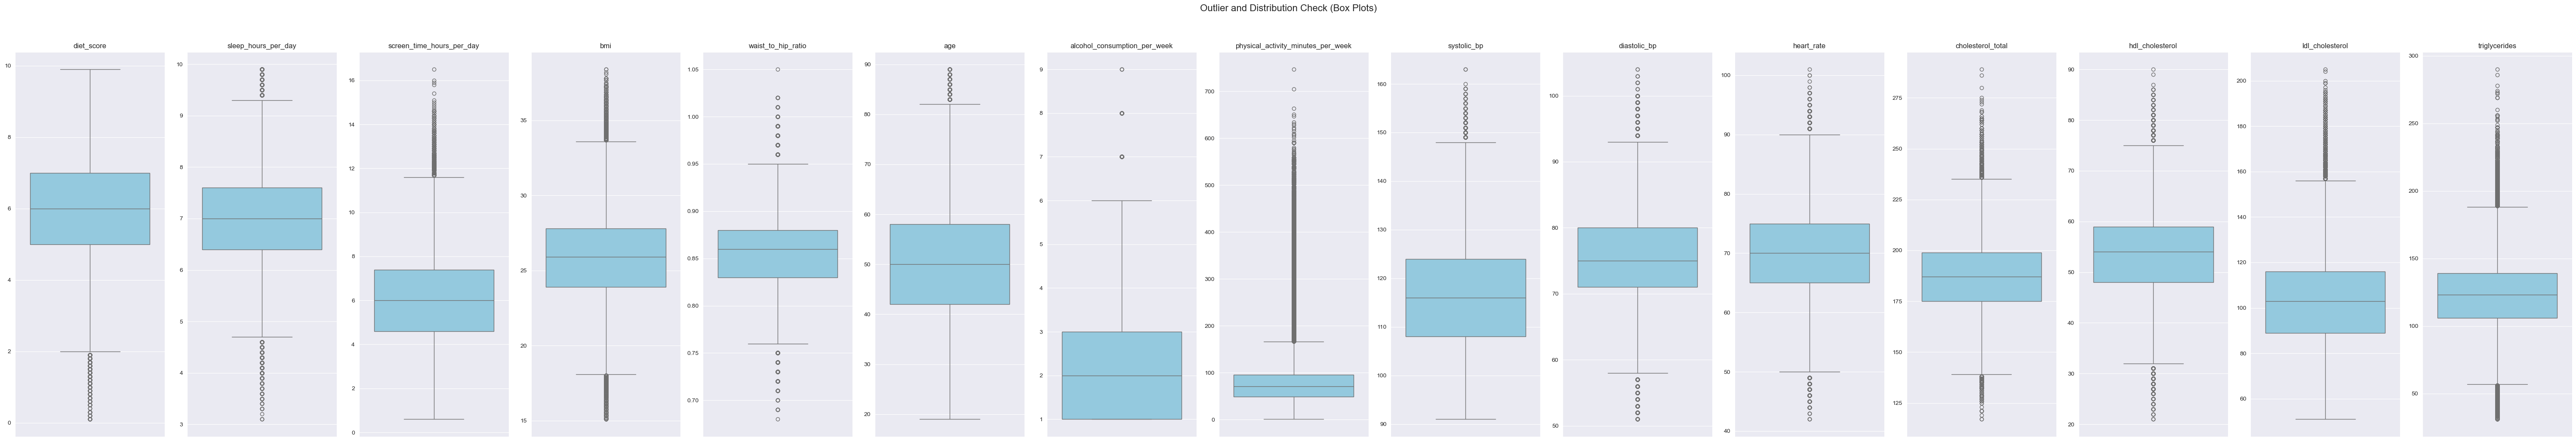

In [8]:
ncols = len(vars_dict["true_numerical_vars"])

fig, axes = plt.subplots(1, ncols, figsize=(4 * ncols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(vars_dict["true_numerical_vars"]):
    sns.boxplot(y=training[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Splitting and Preparing the Data

In [9]:
from sklearn.model_selection import train_test_split

SEED = 42

X = training[vars_dict["all_vars"]]
y = training["diagnosed_diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts())

(490000, 24) (210000, 24)
diagnosed_diabetes
1.0    305131
0.0    184869
Name: count, dtype: int64


Training data is skewed. So I will use bootstrapping on my training data.

In [10]:
from sklearn.utils import resample

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data.diagnosed_diabetes == 1]
minority = train_data[train_data.diagnosed_diabetes == 0]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=SEED)

train_data_balanced = pd.concat([majority, minority_upsampled])
train_data_balanced = train_data_balanced.sample(frac=1, random_state=SEED).reset_index(drop=True)

X_train = train_data_balanced.drop('diagnosed_diabetes', axis=1)
y_train = train_data_balanced['diagnosed_diabetes']

print(f"Balanced Train Counts:\n{y_train.value_counts()}")

Balanced Train Counts:
diagnosed_diabetes
1.0    305131
0.0    305131
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[vars_dict["true_numerical_vars"]])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[vars_dict["true_numerical_vars"]])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=X_test.index
)

In [12]:
X_train = pd.get_dummies(X_train[vars_dict["true_categorical_vars"]], drop_first=True)
X_test = pd.get_dummies(X_test[vars_dict["true_categorical_vars"]], drop_first=True)

X_train_encoded, X_test_encoded = X_train.align(
    X_test,
    join='left',
    axis=1,
    fill_value=0
)

print(f"Encoded Shape Train: {X_train_encoded.shape}, Test: {X_test_encoded.shape}")

X_train = pd.concat([X_train_scaled_df, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_encoded], axis=1)

print(f"Final Feature Shape Train: {X_train.shape}, Test: {X_test.shape}")

Encoded Shape Train: (610262, 21), Test: (210000, 21)
Final Feature Shape Train: (610262, 36), Test: (210000, 36)


In [13]:
X_train.head()

diet_score  sleep_hours_per_day  screen_time_hours_per_day       bmi  \
0    1.785588             0.552806                   0.245210 -0.627645   
1    1.103056             1.108131                   0.393594  0.001493   
2    0.693537             0.330676                  -0.249406  0.980154   
3    0.079259            -0.113584                   1.283903 -0.208219   
4   -0.057248            -0.779973                  -0.101021 -0.452884   

   waist_to_hip_ratio       age  alcohol_consumption_per_week  \
0            0.317228  0.184502                     -1.021358   
1            0.317228  0.270440                     -1.021358   
2            0.317228 -2.393653                     -0.066504   
3           -0.472620 -0.331129                     -0.066504   
4            1.370358 -1.104576                     -1.021358   

   physical_activity_minutes_per_week  systolic_bp  diastolic_bp  ...  \
0                           -0.572585     1.823945     -1.374273  ...   
1                           -0.967028     0.640708     -0.494817  ...   
2                            0.047253    -1.179657     -1.960578  ...   
3                            0.141168    -2.089840      0.238064  ...   
4                           -0.666500    -0.451511     -1.960578  ...   

   education_level_Postgraduate  income_level_Low  income_level_Lower-Middle  \
0                          True             False                      False   
1                         False             False                      False   
2                         False             False                      False   
3                         False             False                      False   
4                         False             False                       True   

   income_level_Middle  income_level_Upper-Middle  smoking_status_Former  \
0                 True                      False                   True   
1                 True                      False                   True   
2                 True                      False                  False   
3                 True                      False                  False   
4                False                      False                  False   

   smoking_status_Never  employment_status_Retired  employment_status_Student  \
0                 False                      False                      False   
1                 False                      False                      False   
2                 False                      False                      False   
3                  True                      False                      False   
4                  True                      False                      False   

   employment_status_Unemployed  
0                         False  
1                         False  
2                         False  
3                         False  
4                         False  

[5 rows x 36 columns]

# Evaluation Function

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph, trained):
    if not trained:
        model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_ap = average_precision_score(y_test, y_prob_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f} | Train AUC: {train_auc:.4f}")
    print(f"Test  Accuracy: {test_acc:.4f} | Test  AUC: {test_auc:.4f}")

    if (train_acc - test_acc) > 0.05:
         print("⚠️ Warning: Signs of Overfitting (Train is much better than Test)")
    else:
         print("✅ Model seems balanced")
    print("-" * 30)

    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {test_ap:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": test_acc,
        "auc": test_auc,
        "average_precision": test_ap,
        "train_accuracy": train_acc,
        "train_auc": train_auc
    }

def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    df['overfitting_gap'] = df['train_auc'] - df['auc']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[df['is_overfit'] == False].copy()
    df_overfit = df[df['is_overfit'] == True].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ The following models were disqualified due to overfitting:")
        display(df_overfit[['model', 'accuracy', 'auc', 'train_auc', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models are overfitting (by the chosen threshold).")
        print("Falling back to ranking ALL models by AUC.")
        df_valid = df.copy()

    print("Best by Accuracy:")
    display(df_valid.sort_values(by="accuracy", ascending=False).head(1))

    print("Best by AUC:")
    display(df_valid.sort_values(by="auc", ascending=False).head(1))

    print("Best by Average Precision:")
    display(df_valid.sort_values(by="average_precision", ascending=False).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_acc"] = df_valid["accuracy"].rank(ascending=False)
    df_valid_ranked["rank_auc"] = df_valid["auc"].rank(ascending=False)
    df_valid_ranked["rank_ap"] = df_valid["average_precision"].rank(ascending=False)


    final_ranking = df_valid_ranked.sort_values(
        by=["rank_auc", "rank_acc", "rank_ap"]
    )

    cols = ['model', 'accuracy', 'auc', 'average_precision', 'overfitting_gap']
    print("\nFinal ranking (higher = better):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best model: {best_model_name}")

    return best_model_name

# Logistic Regression Model

--- Logistic Regression ---
Train Accuracy: 0.6378 | Train AUC: 0.6961
Test  Accuracy: 0.6285 | Test  AUC: 0.6953
✅ Model seems balanced
------------------------------


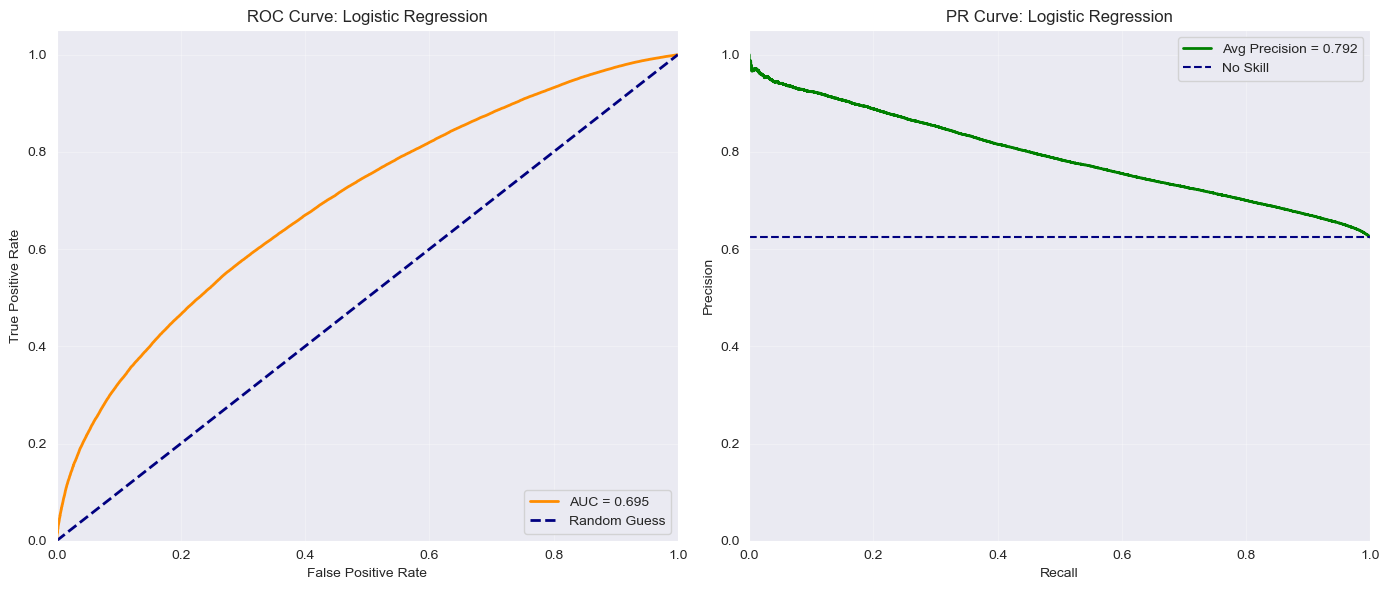

In [15]:
from sklearn.linear_model import LogisticRegression

results = []

lr = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr, X_train, y_train, X_test, y_test, "Logistic Regression", True, False)
)

# Gradient Boosting Classifier Model

--- Gradient Boosting (Tuned) ---
Train Accuracy: 0.6606 | Train AUC: 0.7243
Test  Accuracy: 0.6422 | Test  AUC: 0.7122
✅ Model seems balanced
------------------------------


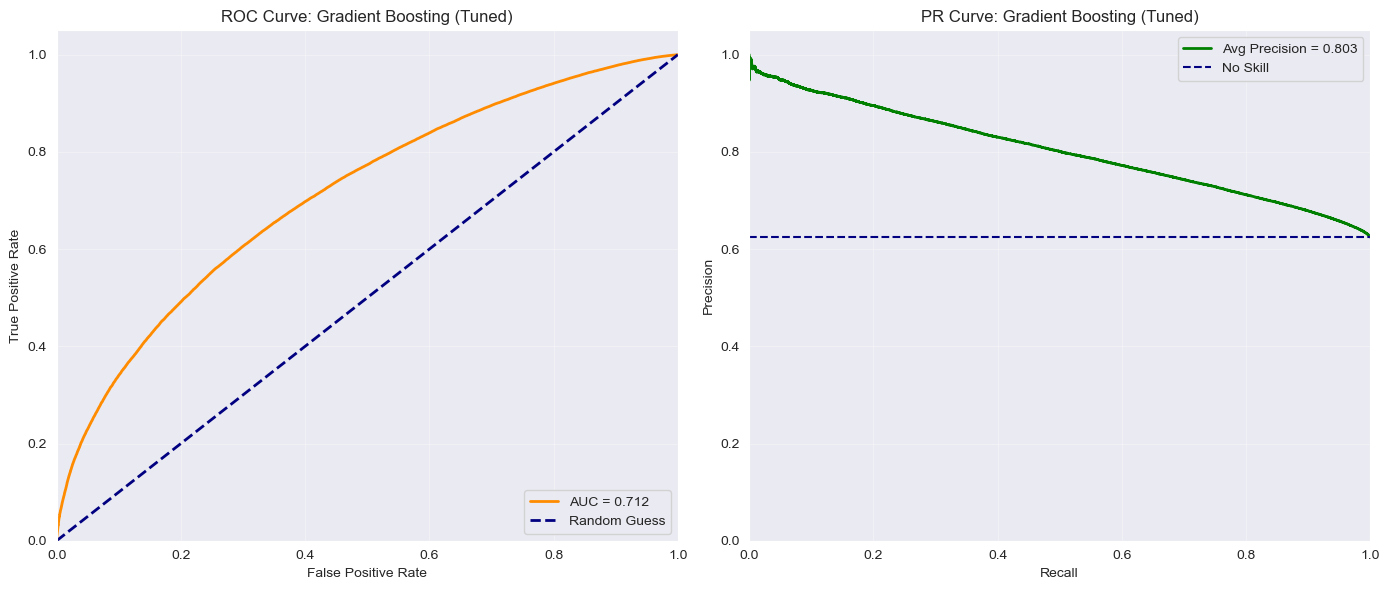

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# found with this code
# gb_hyper = GradientBoostingClassifier(random_state=SEED)
# param_distributions_gb = {
#     'n_estimators': randint(low=50, high=500),
#     'learning_rate': loguniform(0.001, 0.2),
#     'max_depth': randint(3, 8)
# }
#
# N_ITERATIONS = 5
#
# random_search_gb = RandomizedSearchCV(
#     estimator=gb_hyper,
#     param_distributions=param_distributions_gb,
#     n_iter=N_ITERATIONS,
#     cv=3,
#     scoring='roc_auc',
#     verbose=1,
#     n_jobs=-1,
#     random_state=SEED
# )

best_params = {
    'learning_rate': np.float64(0.0483437145318464),
    'max_depth': 7,
    'n_estimators': 70
}

tuned_gb = GradientBoostingClassifier(
    random_state=SEED,
    **best_params
)

results.append(
    evaluate_and_graph(tuned_gb, X_train, y_train, X_test, y_test, "Gradient Boosting (Tuned)", True, False)
)

--- Gradient Boosting 2 (Tuned) ---
Train Accuracy: 0.7141 | Train AUC: 0.7928
Test  Accuracy: 0.6570 | Test  AUC: 0.7231
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


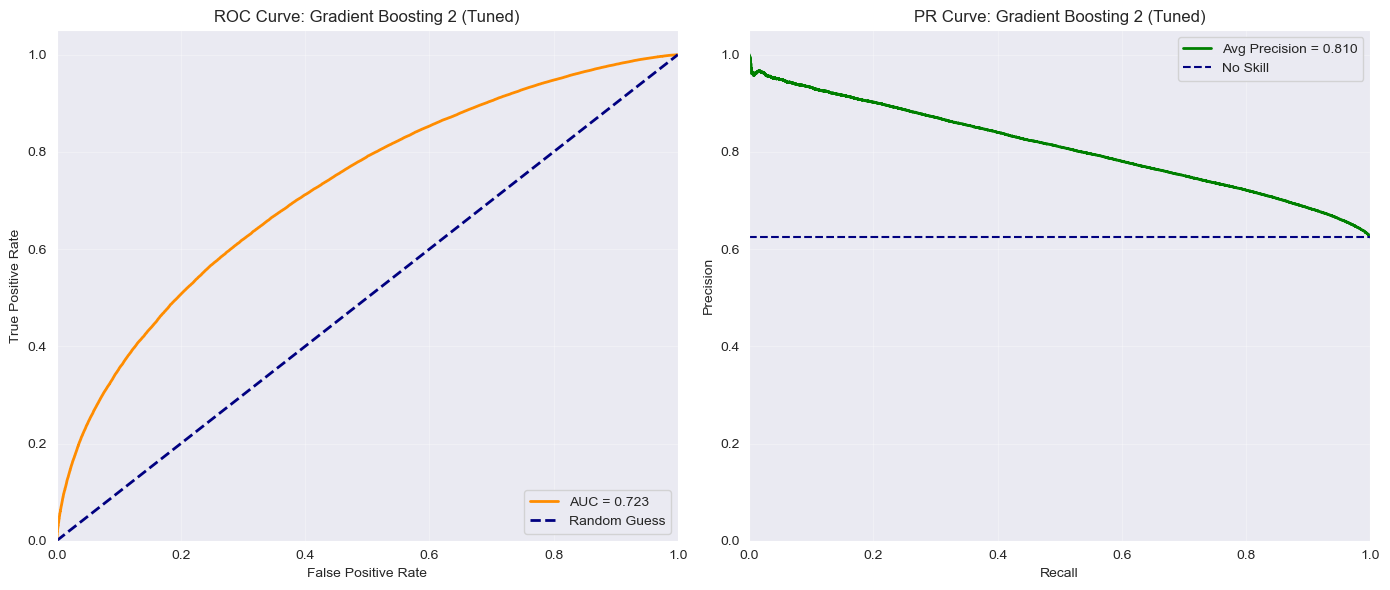

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# found with this code
# gb_hyper = GradientBoostingClassifier(random_state=SEED)
# param_distributions_gb = {
#     'n_estimators': randint(low=50, high=500),
#     'learning_rate': loguniform(0.001, 0.2),
#     'max_depth': randint(3, 8)
# }
#
# N_ITERATIONS = 20
#
# random_search_gb = RandomizedSearchCV(
#     estimator=gb_hyper,
#     param_distributions=param_distributions_gb,
#     n_iter=N_ITERATIONS,
#     cv=5,
#     scoring='roc_auc',
#     verbose=1,
#     n_jobs=-1,
#     random_state=SEED
# )

best_params = {
    'learning_rate': np.float64(0.09522449329415009),
    'max_depth': 7,
    'n_estimators': 378
}

tuned_gb2 = GradientBoostingClassifier(
    random_state=SEED,
    **best_params
)

results.append(
    evaluate_and_graph(tuned_gb2, X_train, y_train, X_test, y_test, "Gradient Boosting 2 (Tuned)", True, False)
)

# XGBoost

--- XGBoost ---
Train Accuracy: 0.6597 | Train AUC: 0.7228
Test  Accuracy: 0.6416 | Test  AUC: 0.7118
✅ Model seems balanced
------------------------------


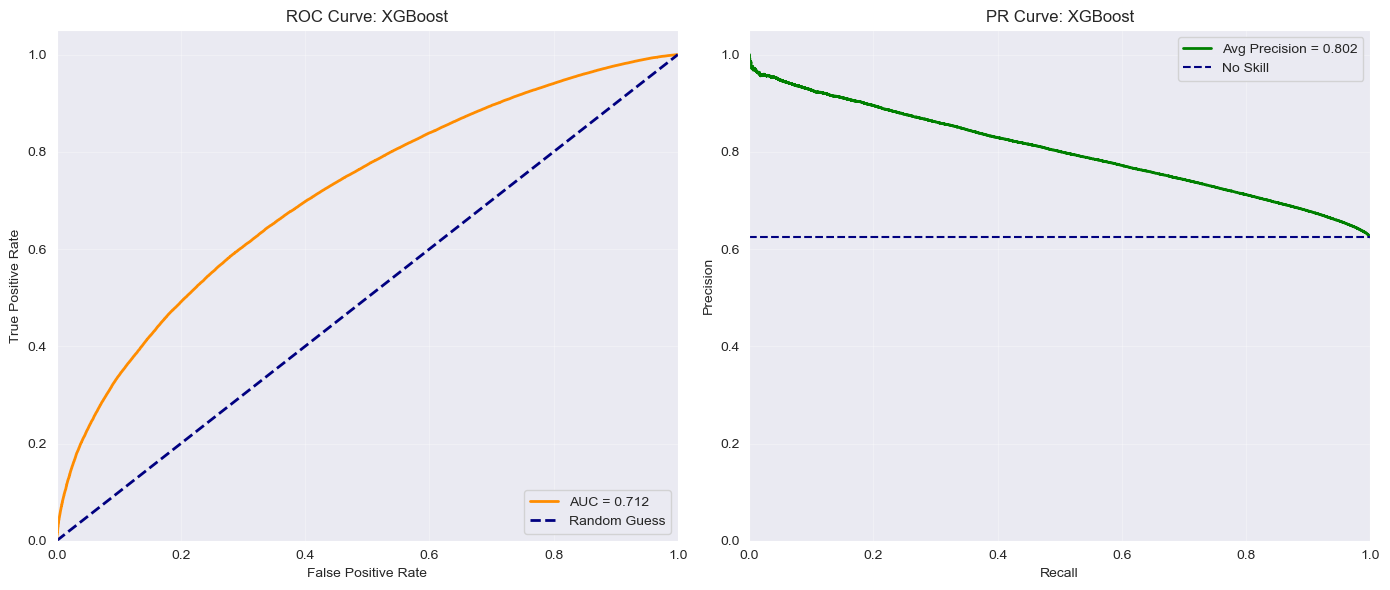

In [17]:
from xgboost import XGBClassifier

xgb_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "max_depth": int(best_params["max_depth"]),
    "n_estimators": int(best_params["n_estimators"]),
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "reg_lambda": 1.0,
    "random_state": SEED,
    "eval_metric": "logloss",
    "tree_method": "hist",
}

xgb = XGBClassifier(**xgb_params)

results.append(
    evaluate_and_graph(xgb, X_train, y_train, X_test, y_test, "XGBoost", True, False)
)

--- XGBoost 2 ---
Train Accuracy: 0.6898 | Train AUC: 0.7610
Test  Accuracy: 0.6555 | Test  AUC: 0.7246
✅ Model seems balanced
------------------------------


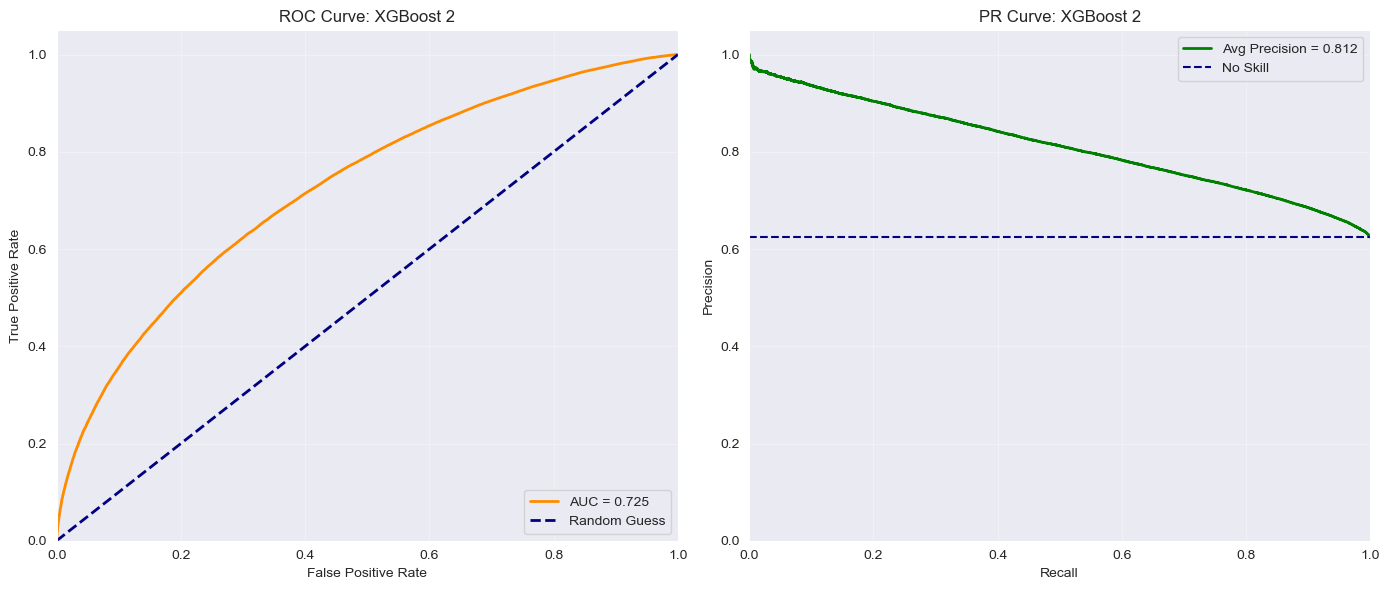

In [18]:
xgb_params = {
    'n_estimators': 761,
    'max_depth': 6,
    'learning_rate': 0.040633190913267676,
    'subsample': 0.7775966321020011,
    'colsample_bytree': 0.7851714261427719,
    'min_child_weight': 0.14648639179742542,
    'gamma': 7.167434442514696e-06,
    'reg_alpha': 2.849927650215022e-05,
    'reg_lambda': 0.005476937455268898,
    'seed': SEED,
    "eval_metric": "logloss",
    "tree_method": "hist",
}

xgb2 = XGBClassifier(**xgb_params)

results.append(
    evaluate_and_graph(xgb2, X_train, y_train, X_test, y_test, "XGBoost 2", True, False)
)

/opt/homebrew/anaconda3/envs/kaggle/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-12-21 14:50:08,210] A new study created in memory with name: no-name-57dff99f-f7b4-4e86-8945-cce48f493970
[I 2025-12-21 14:52:36,824] Trial 0 finished with value: 0.7470913421848199 and parameters: {'n_estimators': 4020, 'max_depth': 5, 'learning_rate': 0.026885363782007347, 'subsample': 0.8266353983860237, 'colsample_bytree': 0.6995049425831503, 'min_child_weight': 12.524085649800842, 'gamma': 1.0431090206580598e-07, 'reg_alpha': 0.03627565413882947, 'reg_lambda': 0.780748222656643}. Best is trial 0 with value: 0.7470913421848199.
[I 2025-12-21 14:55:40,649] Trial 1 finished with value: 0.7141209660775448 and parameters: {'n_estimators': 4476, 'max_depth': 5, 'learning_rate': 0.0010353613631204298, 'subsample': 

Best AUC: 0.7645431908076187
Best params: {'n_estimators': 3361, 'max_depth': 6, 'learning_rate': 0.026230974052970556, 'subsample': 0.7892225302033898, 'colsample_bytree': 0.9974900738215209, 'min_child_weight': 0.22868937726960187, 'gamma': 1.1455511515722334, 'reg_alpha': 3.393520236225474e-08, 'reg_lambda': 0.0967926556110065}
--- XGBoost (Optuna) ---
Train Accuracy: 0.7321 | Train AUC: 0.8127
Test  Accuracy: 0.6600 | Test  AUC: 0.7238
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


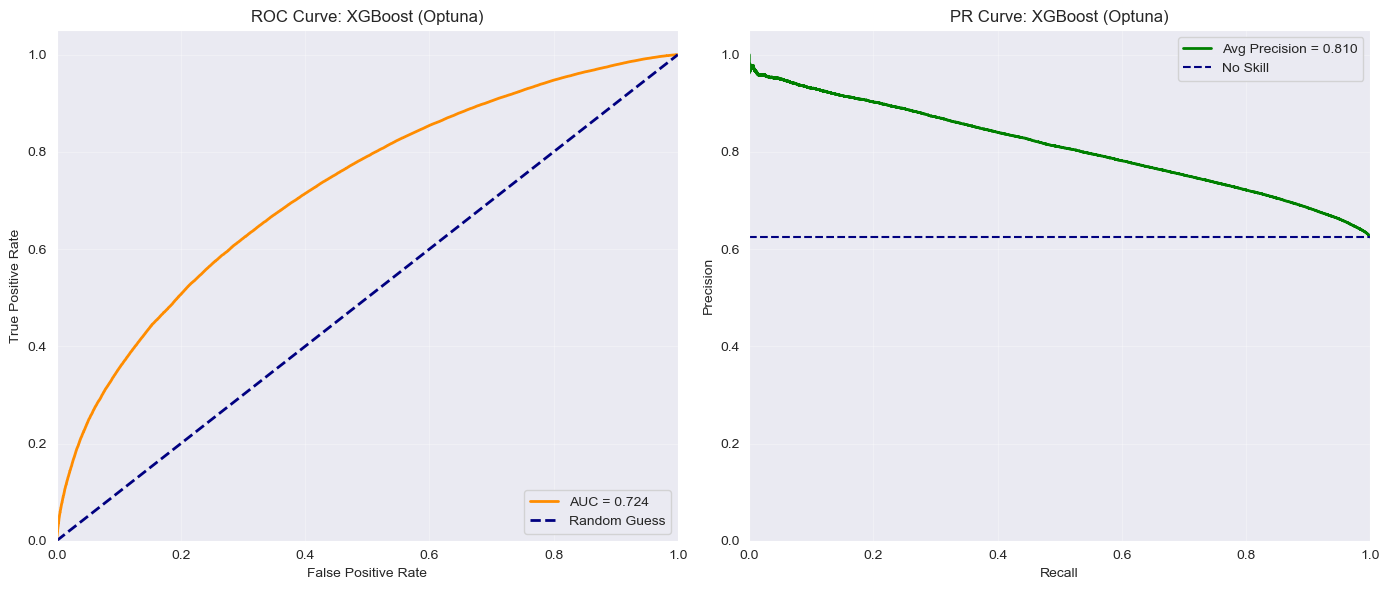

In [19]:
import optuna
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

def objective_xgboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 5000),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_float("min_child_weight", 1e-2, 30.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 10.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 50.0, log=True),
        "random_state": SEED,
        "eval_metric": "logloss",
        "tree_method": "hist",
    }

    aucs = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_va = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = XGBClassifier(**params, early_stopping_rounds=50)
        model.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)

        p = model.predict_proba(X_va)[:, 1]
        aucs.append(roc_auc_score(y_va, p))

    return float(np.mean(aucs))

study = optuna.create_study(direction="maximize")
study.optimize(objective_xgboost, n_trials=10)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)

best_xgb = XGBClassifier(
    **study.best_params,
    random_state=SEED,
    eval_metric="logloss",
    tree_method="hist"
)

results.append(
    evaluate_and_graph(best_xgb, X_train, y_train, X_test, y_test, "XGBoost (Optuna)", True, False)
)

# LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- LightGBM ---
Train Accuracy: 0.6574 | Train AUC: 0.7195
Test  Accuracy: 0.6417 | Test  AUC: 0.7121
✅ Model seems balanced
------------------------------


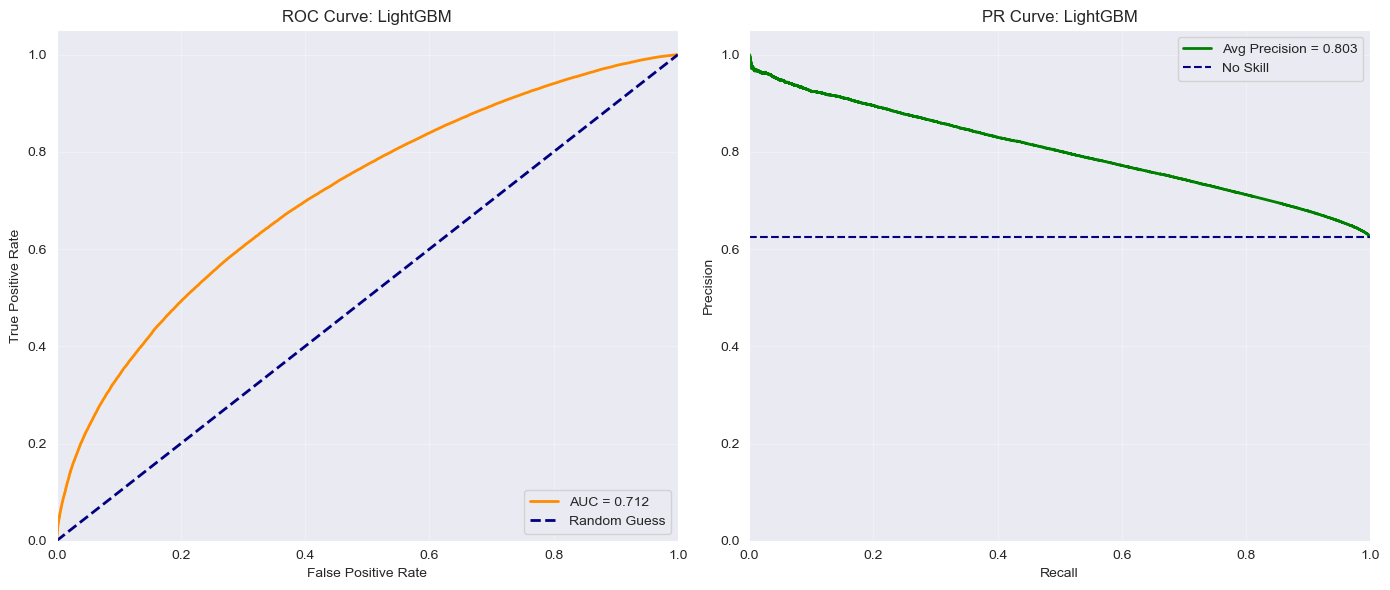

In [20]:
from lightgbm import LGBMClassifier

lgbm_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "max_depth": int(best_params["max_depth"]),
    "n_estimators": int(best_params["n_estimators"]),
    "num_leaves": 63,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "random_state": SEED,
}

lgbm = LGBMClassifier(**lgbm_params)

results.append(
    evaluate_and_graph(lgbm, X_train, y_train, X_test, y_test, "LightGBM", True, False)
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

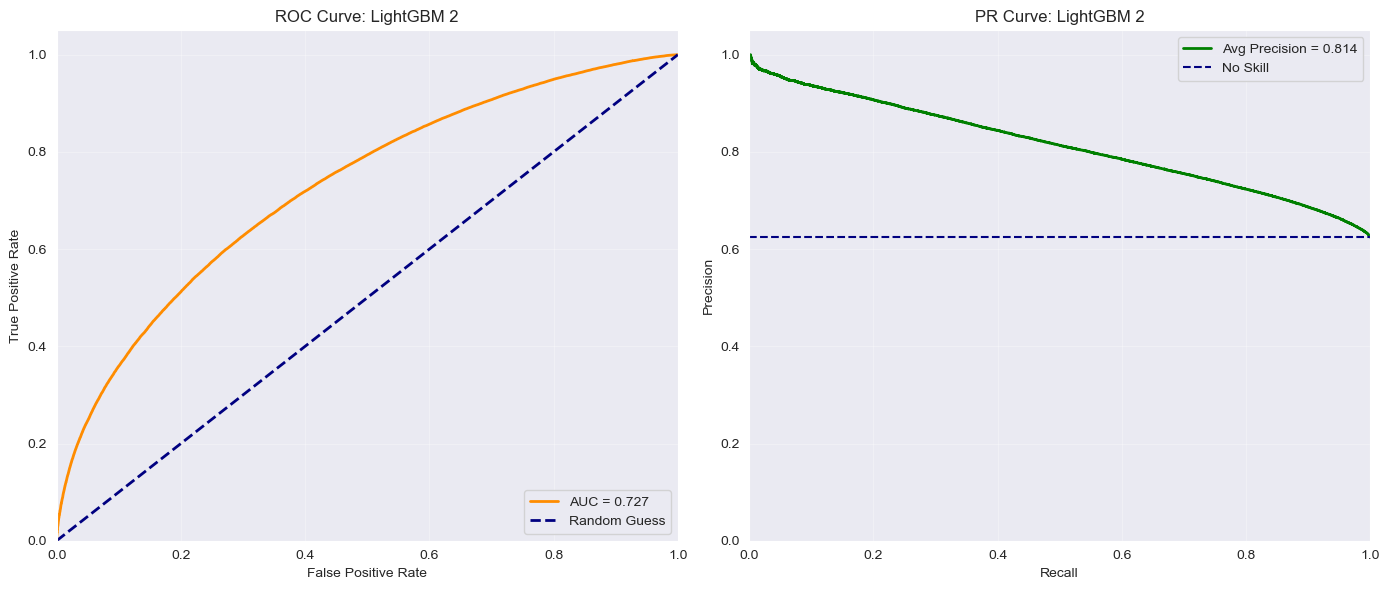

In [21]:
lgbm_params = {
    'n_estimators': 4995,
    'learning_rate': 0.025553827393496757,
    'max_depth': 5,
    'num_leaves': 92,
    'min_child_samples': 1618,
    'subsample': 0.6266971096130706,
    'colsample_bytree': 0.817427771257704,
    'reg_alpha': 1.798315741693369e-08,
    'reg_lambda': 0.024621192538643276,
    "random_state": SEED,
}

lgbm2 = LGBMClassifier(**lgbm_params)

results.append(
    evaluate_and_graph(lgbm2, X_train, y_train, X_test, y_test, "LightGBM 2", True, False)
)

[I 2025-12-21 15:08:04,935] A new study created in memory with name: no-name-d254f087-108c-4f3c-859a-1c0ec71d8d64


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3281]	valid_0's auc: 0.745784	valid_0's binary_logloss: 0.592357
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3281]	valid_0's auc: 0.744308	valid_0's binary_logloss: 0.593647
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3280]	valid_0's auc: 0.744594	valid_0's binary_logloss: 0.593593
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3281]	valid_0's auc: 0.744512	valid_0's binary_logloss: 0.593545
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3281]	valid_0's auc: 0.7454	valid_0's binary_logloss: 0.592854


[I 2025-12-21 15:10:46,969] Trial 0 finished with value: 0.7449195868416835 and parameters: {'n_estimators': 3281, 'learning_rate': 0.06863841859529114, 'max_depth': 5, 'num_leaves': 236, 'min_child_samples': 1244, 'subsample': 0.7108667664940694, 'colsample_bytree': 0.6672517528236681, 'reg_alpha': 0.025374227424749513, 'reg_lambda': 9.816941596204254}. Best is trial 0 with value: 0.7449195868416835.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1161]	valid_0's auc: 0.729635	valid_0's binary_logloss: 0.605878
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1159]	valid_0's auc: 0.727698	valid_0's binary_logloss: 0.607159
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1158]	valid_0's auc: 0.727989	valid_0's binary_logloss: 0.607235
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1160]	valid_0's auc: 0.728643	valid_0's binary_logloss: 0.606255
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1161]	valid_0's auc: 0.730328	valid_0's binary_logloss: 0.605215


[I 2025-12-21 15:11:26,869] Trial 1 finished with value: 0.7288585763624293 and parameters: {'n_estimators': 1161, 'learning_rate': 0.1329546806660702, 'max_depth': 2, 'num_leaves': 17, 'min_child_samples': 897, 'subsample': 0.9917062468347689, 'colsample_bytree': 0.9295085785358894, 'reg_alpha': 5.430608874365887e-06, 'reg_lambda': 49.59754174325098}. Best is trial 0 with value: 0.7449195868416835.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2243]	valid_0's auc: 0.711756	valid_0's binary_logloss: 0.61968
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2243]	valid_0's auc: 0.709913	valid_0's binary_logloss: 0.620807
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2243]	valid_0's auc: 0.71091	valid_0's binary_logloss: 0.6204
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2243]	valid_0's auc: 0.711721	valid_0's binary_logloss: 0.61963
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2243]	valid_0's auc: 0.712452	valid_0's binary_logloss: 0.61899


[I 2025-12-21 15:13:39,671] Trial 2 finished with value: 0.7113501942654381 and parameters: {'n_estimators': 2243, 'learning_rate': 0.002114035393603185, 'max_depth': 6, 'num_leaves': 17, 'min_child_samples': 650, 'subsample': 0.8538478011099413, 'colsample_bytree': 0.9922597785974445, 'reg_alpha': 0.00017389893548877723, 'reg_lambda': 0.0032827355050524007}. Best is trial 0 with value: 0.7449195868416835.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[105]	valid_0's auc: 0.709857	valid_0's binary_logloss: 0.619956
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[105]	valid_0's auc: 0.706946	valid_0's binary_logloss: 0.621675
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[105]	valid_0's auc: 0.708073	valid_0's binary_logloss: 0.621139
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[105]	valid_0's auc: 0.708843	valid_0's binary_logloss: 0.620623
Training until validation scores don't improve for 50 rounds


[I 2025-12-21 15:13:44,607] Trial 3 finished with value: 0.7088354413193679 and parameters: {'n_estimators': 105, 'learning_rate': 0.16363599942182594, 'max_depth': 2, 'num_leaves': 56, 'min_child_samples': 1619, 'subsample': 0.9452332901199151, 'colsample_bytree': 0.6331337964303331, 'reg_alpha': 0.059686039768291434, 'reg_lambda': 1.0461952317478833}. Best is trial 0 with value: 0.7449195868416835.


Did not meet early stopping. Best iteration is:
[105]	valid_0's auc: 0.710459	valid_0's binary_logloss: 0.619256
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1118]	valid_0's auc: 0.737825	valid_0's binary_logloss: 0.599192
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1117]	valid_0's auc: 0.736394	valid_0's binary_logloss: 0.600192
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1118]	valid_0's auc: 0.736902	valid_0's binary_logloss: 0.600225
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1118]	valid_0's auc: 0.736316	valid_0's binary_logloss: 0.600208
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1118]	valid_0's auc: 0.73814	valid_0's binary_logloss: 0.599081


[I 2025-12-21 15:14:47,551] Trial 4 finished with value: 0.7371155913773277 and parameters: {'n_estimators': 1118, 'learning_rate': 0.06484038395946293, 'max_depth': 6, 'num_leaves': 138, 'min_child_samples': 1940, 'subsample': 0.876029017488925, 'colsample_bytree': 0.822899375290644, 'reg_alpha': 0.0003703882801370964, 'reg_lambda': 0.004459112871421134}. Best is trial 0 with value: 0.7449195868416835.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1306]	valid_0's auc: 0.71304	valid_0's binary_logloss: 0.617862
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1306]	valid_0's auc: 0.71079	valid_0's binary_logloss: 0.619208
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1306]	valid_0's auc: 0.710422	valid_0's binary_logloss: 0.619495
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1306]	valid_0's auc: 0.712177	valid_0's binary_logloss: 0.618325
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1306]	valid_0's auc: 0.713503	valid_0's binary_logloss: 0.617209


[I 2025-12-21 15:15:33,025] Trial 5 finished with value: 0.7119864660299215 and parameters: {'n_estimators': 1306, 'learning_rate': 0.018303570176643275, 'max_depth': 2, 'num_leaves': 248, 'min_child_samples': 1105, 'subsample': 0.6576146965304813, 'colsample_bytree': 0.6965514192731347, 'reg_alpha': 4.8082346458789775, 'reg_lambda': 0.34101842060186177}. Best is trial 0 with value: 0.7449195868416835.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[295]	valid_0's auc: 0.692698	valid_0's binary_logloss: 0.639195
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[295]	valid_0's auc: 0.689922	valid_0's binary_logloss: 0.640351
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[295]	valid_0's auc: 0.690201	valid_0's binary_logloss: 0.640435
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[295]	valid_0's auc: 0.691329	valid_0's binary_logloss: 0.639609
Training until validation scores don't improve for 50 rounds


[I 2025-12-21 15:15:43,267] Trial 6 finished with value: 0.6913627149570415 and parameters: {'n_estimators': 295, 'learning_rate': 0.008606673929006124, 'max_depth': 2, 'num_leaves': 29, 'min_child_samples': 596, 'subsample': 0.7230963205532775, 'colsample_bytree': 0.7334845801082864, 'reg_alpha': 2.159236220339493e-06, 'reg_lambda': 0.025813141295564643}. Best is trial 0 with value: 0.7449195868416835.


Did not meet early stopping. Best iteration is:
[295]	valid_0's auc: 0.692664	valid_0's binary_logloss: 0.638821
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4077]	valid_0's auc: 0.720405	valid_0's binary_logloss: 0.612843
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4077]	valid_0's auc: 0.718111	valid_0's binary_logloss: 0.614171
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4077]	valid_0's auc: 0.719079	valid_0's binary_logloss: 0.613832
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4077]	valid_0's auc: 0.719395	valid_0's binary_logloss: 0.613308
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[4077]	valid_0's auc: 0.721501	valid_0's binary_logloss: 0.611907


[I 2025-12-21 15:18:21,173] Trial 7 finished with value: 0.7196980928676109 and parameters: {'n_estimators': 4077, 'learning_rate': 0.00632614530206542, 'max_depth': 3, 'num_leaves': 133, 'min_child_samples': 1978, 'subsample': 0.6226085351115017, 'colsample_bytree': 0.8810177742342584, 'reg_alpha': 0.00020456851296041424, 'reg_lambda': 15.180355768850394}. Best is trial 0 with value: 0.7449195868416835.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3458]	valid_0's auc: 0.711913	valid_0's binary_logloss: 0.618601
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3458]	valid_0's auc: 0.708908	valid_0's binary_logloss: 0.620343
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3458]	valid_0's auc: 0.71056	valid_0's binary_logloss: 0.619553
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.675946	valid_0's binary_logloss: 0.68837
Training until validation scores don't improve for 50 rounds


[I 2025-12-21 15:19:33,789] Trial 8 finished with value: 0.6970608710269847 and parameters: {'n_estimators': 3458, 'learning_rate': 0.006461079922250382, 'max_depth': 2, 'num_leaves': 121, 'min_child_samples': 1716, 'subsample': 0.7381954308644788, 'colsample_bytree': 0.6958653347355288, 'reg_alpha': 1.8085611838854674e-08, 'reg_lambda': 0.0035551321079603923}. Best is trial 0 with value: 0.7449195868416835.


Early stopping, best iteration is:
[14]	valid_0's auc: 0.677977	valid_0's binary_logloss: 0.688305
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[602]	valid_0's auc: 0.734218	valid_0's binary_logloss: 0.602119
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[602]	valid_0's auc: 0.73304	valid_0's binary_logloss: 0.602955
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[602]	valid_0's auc: 0.733215	valid_0's binary_logloss: 0.603144
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[602]	valid_0's auc: 0.733111	valid_0's binary_logloss: 0.60271
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[602]	valid_0's auc: 0.734738	valid_0's binary_logloss: 0.601799


[I 2025-12-21 15:20:05,790] Trial 9 finished with value: 0.7336644801760149 and parameters: {'n_estimators': 602, 'learning_rate': 0.09418218819273959, 'max_depth': 5, 'num_leaves': 90, 'min_child_samples': 1634, 'subsample': 0.8293990839187434, 'colsample_bytree': 0.8029174706134199, 'reg_alpha': 7.513919192907957e-07, 'reg_lambda': 0.09557951049119487}. Best is trial 0 with value: 0.7449195868416835.


Best AUC: 0.7449195868416835
Best params: {'n_estimators': 3281, 'learning_rate': 0.06863841859529114, 'max_depth': 5, 'num_leaves': 236, 'min_child_samples': 1244, 'subsample': 0.7108667664940694, 'colsample_bytree': 0.6672517528236681, 'reg_alpha': 0.025374227424749513, 'reg_lambda': 9.816941596204254}
--- LightGBM (Optuna) ---
Train Accuracy: 0.6997 | Train AUC: 0.7723
Test  Accuracy: 0.6593 | Test  AUC: 0.7260
✅ Model seems balanced
------------------------------


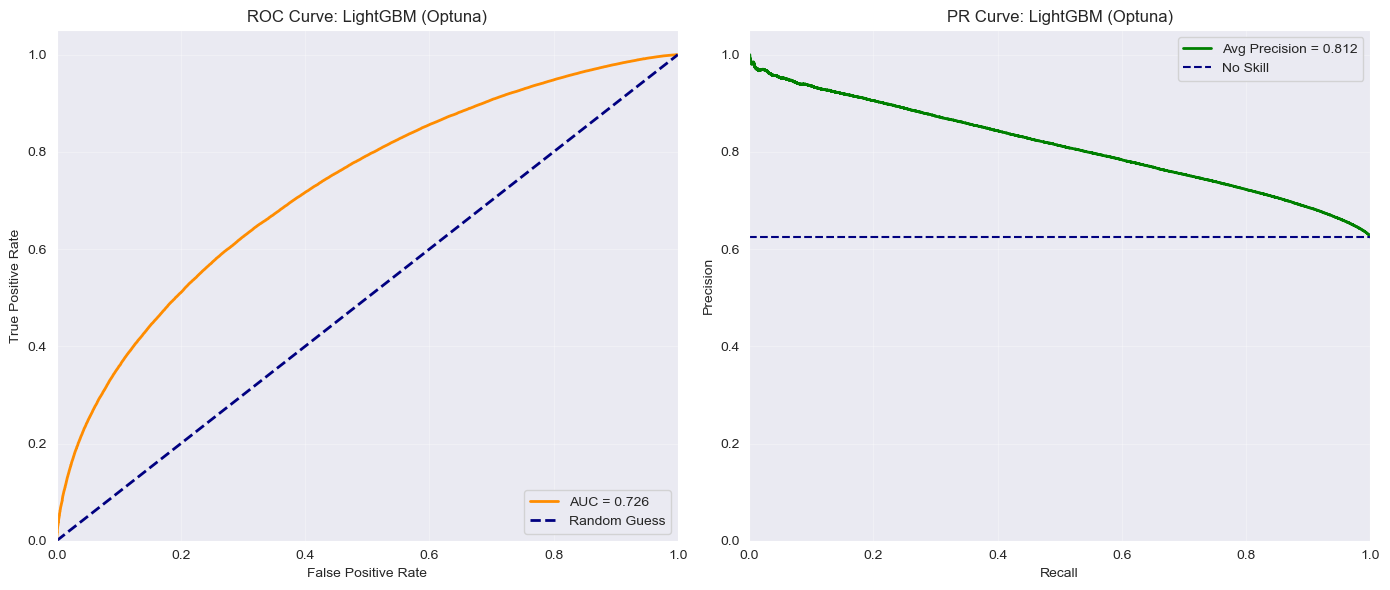

In [22]:
import lightgbm as lgb

def objective_lgm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 5000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "min_child_samples": trial.suggest_int("min_child_samples", 50, 2000),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 50.0, log=True),
        "random_state": SEED,
        "verbosity": -1,
        "n_jobs": -1
    }

    aucs = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_va = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = LGBMClassifier(**params)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_va, y_va)],
            eval_metric="auc",
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)
            ]
        )

        p = model.predict_proba(X_va)[:, 1]
        aucs.append(roc_auc_score(y_va, p))

    return float(np.mean(aucs))

study = optuna.create_study(direction="maximize")
study.optimize(objective_lgm, n_trials=10)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)

best_lgbm = LGBMClassifier(**study.best_params, random_state=SEED)

results.append(
    evaluate_and_graph(best_lgbm, X_train, y_train, X_test, y_test, "LightGBM (Optuna)", True, False)
)

# CatBoost

--- CatBoost ---
Train Accuracy: 0.6462 | Train AUC: 0.7059
Test  Accuracy: 0.6336 | Test  AUC: 0.7038
✅ Model seems balanced
------------------------------


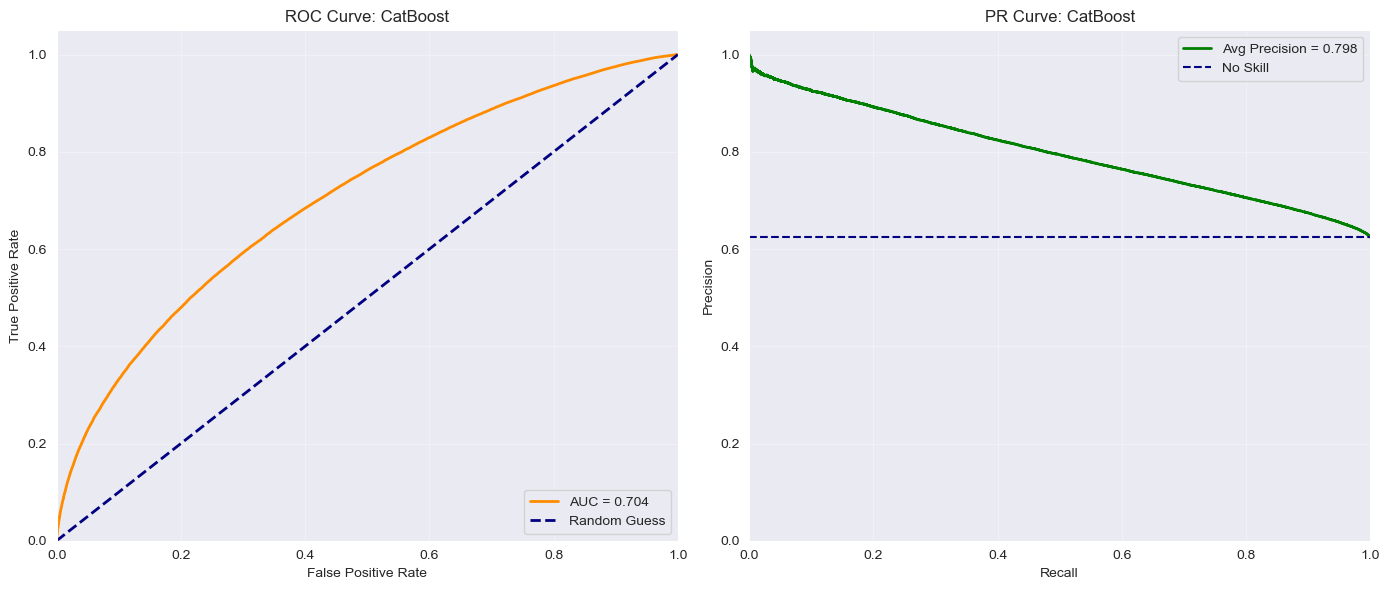

In [23]:
from catboost import CatBoostClassifier

cat_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "depth": int(best_params["max_depth"]),
    "iterations": int(best_params["n_estimators"]),
    "loss_function": "Logloss",
    "random_seed": SEED,
    "verbose": False,
}

cat = CatBoostClassifier(**cat_params)

results.append(
    evaluate_and_graph(cat, X_train, y_train, X_test, y_test, "CatBoost", True, False)
)

--- CatBoost 2 ---
Train Accuracy: 0.6678 | Train AUC: 0.7330
Test  Accuracy: 0.6532 | Test  AUC: 0.7247
✅ Model seems balanced
------------------------------


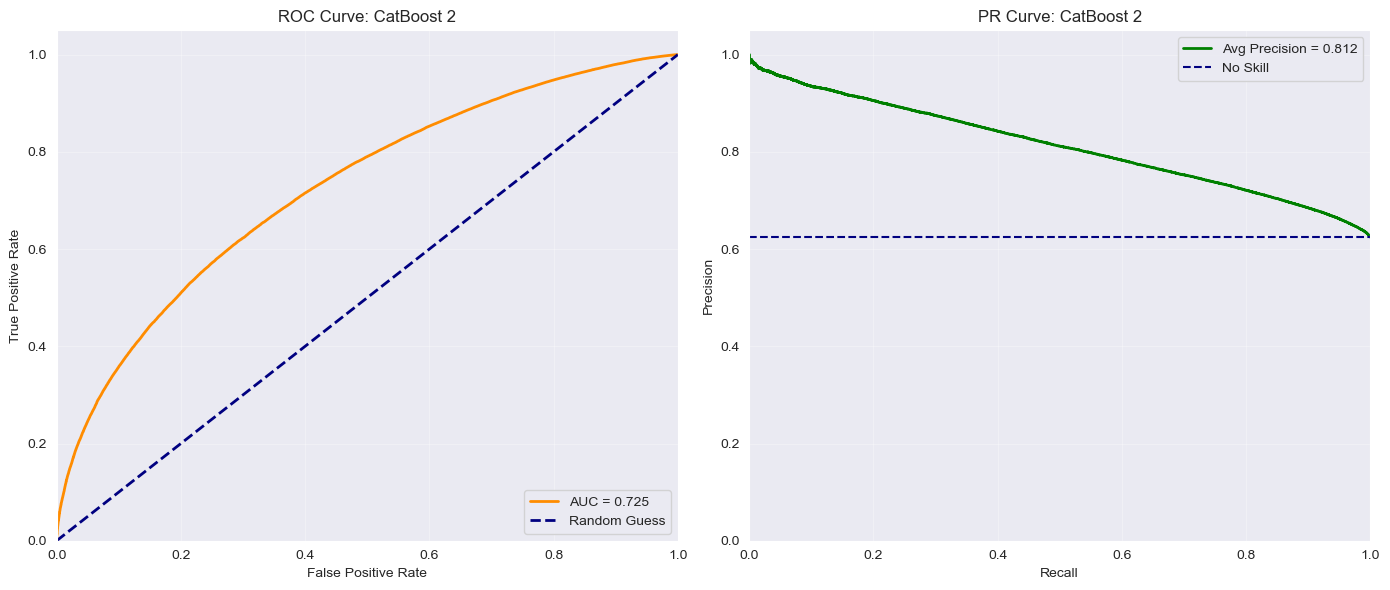

In [24]:
from catboost import CatBoostClassifier

cat_params = {
    'subsample': 1,
    'random_strength': 10,
    'depth': 4,
    'bootstrap_type': 'MVS',
    'learning_rate': 0.05,
    'l2_leaf_reg': 30,
    'iterations': 2000,
    "random_seed": SEED,
    "verbose": False,
}

cat2 = CatBoostClassifier(**cat_params)

results.append(
    evaluate_and_graph(cat2, X_train, y_train, X_test, y_test, "CatBoost 2", True, False)
)


bestTest = 0.7148838454
bestIteration = 1999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.7148838	best: 0.7148838 (0)	total: 46s	remaining: 6m 54s

bestTest = 0.7354983291
bestIteration = 1999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.7354983	best: 0.7354983 (1)	total: 1m 36s	remaining: 6m 24s

bestTest = 0.7160866334
bestIteration = 1999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.7160866	best: 0.7354983 (1)	total: 2m 28s	remaining: 5m 45s

bestTest = 0.7059411871
bestIteration = 1999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.7059412	best: 0.7354983 (1)	total: 3m 5s	remaining: 4m 

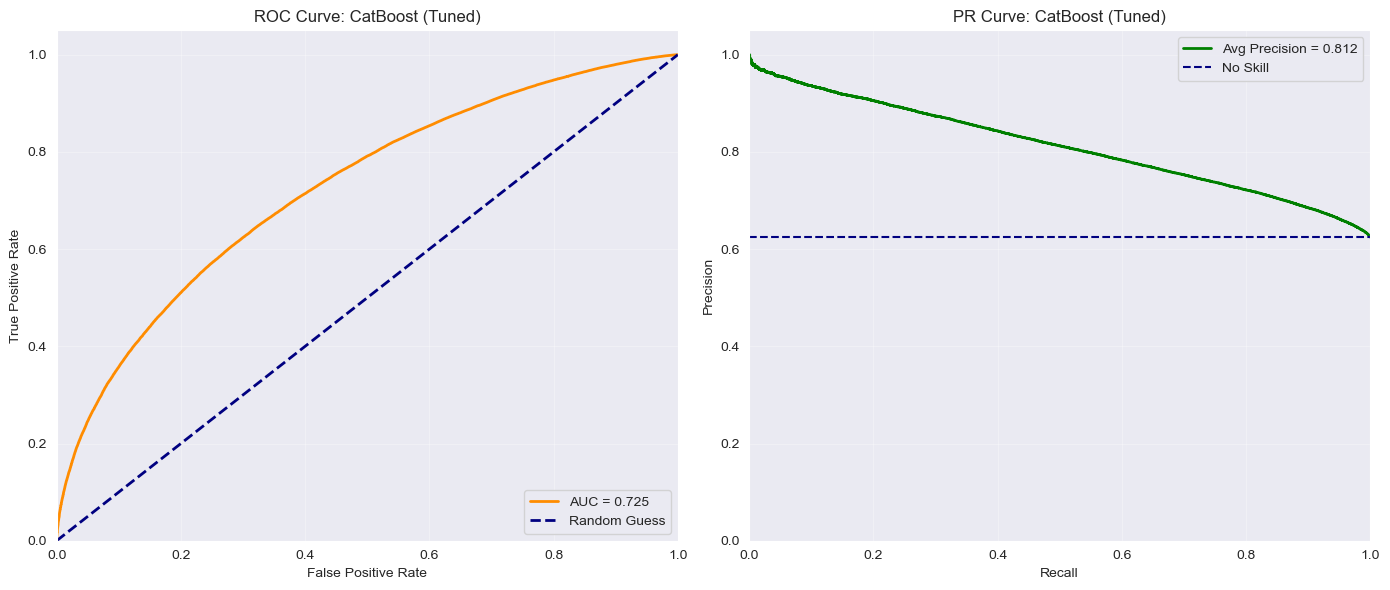

In [25]:
param_grid = {
    "iterations": [2000],
    "depth": [2, 4, 6],
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1],
    "l2_leaf_reg": [3, 10, 30, 50],
    "subsample": [0.6, 1.0],
    "random_strength": [1, 5, 10],
    "bootstrap_type": ["MVS"],
}

cat = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=SEED,
    verbose=False,
    early_stopping_rounds=50,
    od_type="Iter"
)

search_results = cat.randomized_search(
    param_grid,
    X=X_train,
    y=y_train,
    cv=5,
    n_iter=10,
    plot=False
)

best_params = search_results["params"]
print("Best params:", best_params)

best_cat = CatBoostClassifier(
    **best_params,
    random_seed=SEED,
    verbose=False
)

results.append(
    evaluate_and_graph(best_cat, X_train, y_train, X_test, y_test, "CatBoost (Tuned)", True, False)
)

# Ensemble Stacking

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin, clone

weights_stack = {
    "gb_tuned": 2.0,
    "lgbm": 2.0,
    "xgb": 2.0,
    "cat": 1.0,
    "lr": 1.0
}

estimators_stack = [
    ("gb_tuned", tuned_gb),
    ("lgbm", lgbm),
    ("xgb", xgb),
    ("cat", cat),
    ("lr", lr),
]

weights_stack2 = {
    "gb_tuned": 2.0,
    "lgbm2": 2.0,
    "xgb2": 2.0,
    "cat2": 1.0,
    "lr": 1.0
}

estimators_stack2 = [
    ("gb_tuned", tuned_gb),
    ("lgbm2", lgbm),
    ("xgb2", xgb),
    ("cat2", cat),
    ("lr", lr),
]

weights_stack3 = {
    "gb_tuned": 2.0,
    "best_lgbm": 2.0,
    "best_xgb": 2.0,
    "best_cat": 1.0,
    "lr": 1.0
}

estimators_stack3 = [
    ("gb_tuned", tuned_gb),
    ("best_lgbm", best_lgbm),
    ("best_xgb", best_xgb),
    ("best_cat", best_cat),
    ("lr", lr),
]

weights_best = {
    "lgbm2": 4.5,
    "cat_tuned": 3.0,
    "xgb2": 2.0,
    "gb_tuned": 1.0,
    "cat2": 1.0,
    "lr": 0.5
}

estimators_best = [
    ("lgbm2", lgbm2),
    ("cat_tuned", best_cat),
    ("xgb2", xgb2),
    ("gb_tuned", tuned_gb),
    ("cat2", cat2),
    ("lr", lr),
]

class WeightedStackingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimators, final_estimator, weights, cv=5, n_jobs=-1, passthrough=False):
        self.estimators = estimators
        self.final_estimator = final_estimator
        self.weights = weights
        self.cv = cv
        self.n_jobs = n_jobs
        self.passthrough = passthrough

    def fit(self, X, y):
        self._stack = StackingClassifier(
            estimators=self.estimators,
            final_estimator=clone(self.final_estimator),
            stack_method="predict_proba",
            passthrough=self.passthrough,
            cv=self.cv,
            n_jobs=self.n_jobs
        )

        self._stack.fit(X, y)

        self.classes_ = getattr(self._stack, "classes_", np.unique(y))

        self._names = [name for name, _ in self.estimators]

        return self

    def _weighted_meta_features(self, X):
        meta = []
        for name, est in zip(self._names, self._stack.estimators_):
            proba = est.predict_proba(X)

            classes = getattr(est, "classes_", None)
            if classes is None:
                pos_idx = 1
            else:
                pos_idx = list(classes).index(1) if 1 in list(classes) else 1

            p1 = proba[:, pos_idx]
            meta.append(p1)

        meta = np.column_stack(meta)

        w = np.array([float(self.weights.get(n, 1.0)) for n in self._names], dtype=float)
        meta = meta * w

        return meta

    def predict_proba(self, X):
        meta = self._weighted_meta_features(X)

        if self.passthrough:
            # concatenate original features
            X_arr = X.to_numpy() if hasattr(X, "to_numpy") else np.asarray(X)
            meta = np.hstack([meta, X_arr])

        final = self._stack.final_estimator_

        return final.predict_proba(meta)

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244105, number of negative: 244105
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244105, number of negative: 244105
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of 

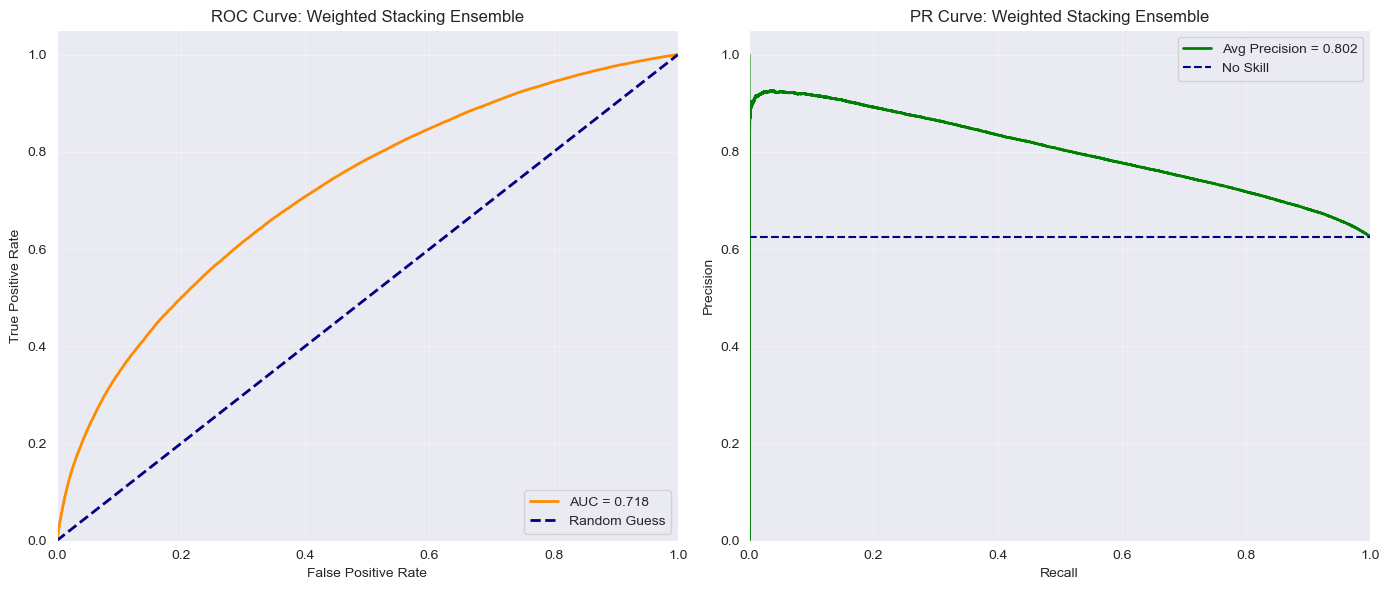

In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

stack_weighted = WeightedStackingClassifier(
    estimators=estimators_stack,
    final_estimator=LogisticRegression(max_iter=3000),
    weights=weights_stack,
    cv=cv,
    n_jobs=-1,
    passthrough=False
)

results.append(
    evaluate_and_graph(stack_weighted, X_train, y_train, X_test, y_test, "Weighted Stacking Ensemble", True, False)
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244105, number of negative: 244105
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

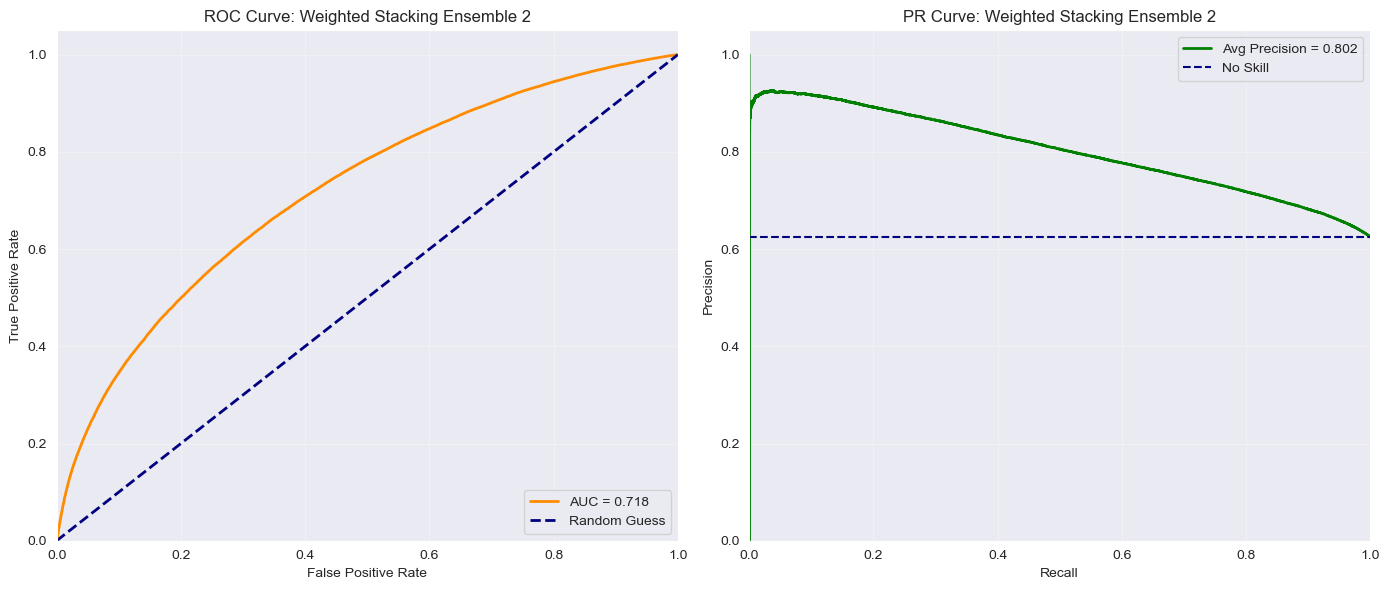

In [37]:
stack_weighted2 = WeightedStackingClassifier(
    estimators=estimators_stack2,
    final_estimator=LogisticRegression(max_iter=3000),
    weights=weights_stack2,
    cv=cv,
    n_jobs=-1,
    passthrough=False
)

results.append(
    evaluate_and_graph(stack_weighted2, X_train, y_train, X_test, y_test, "Weighted Stacking Ensemble 2", True, False)
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

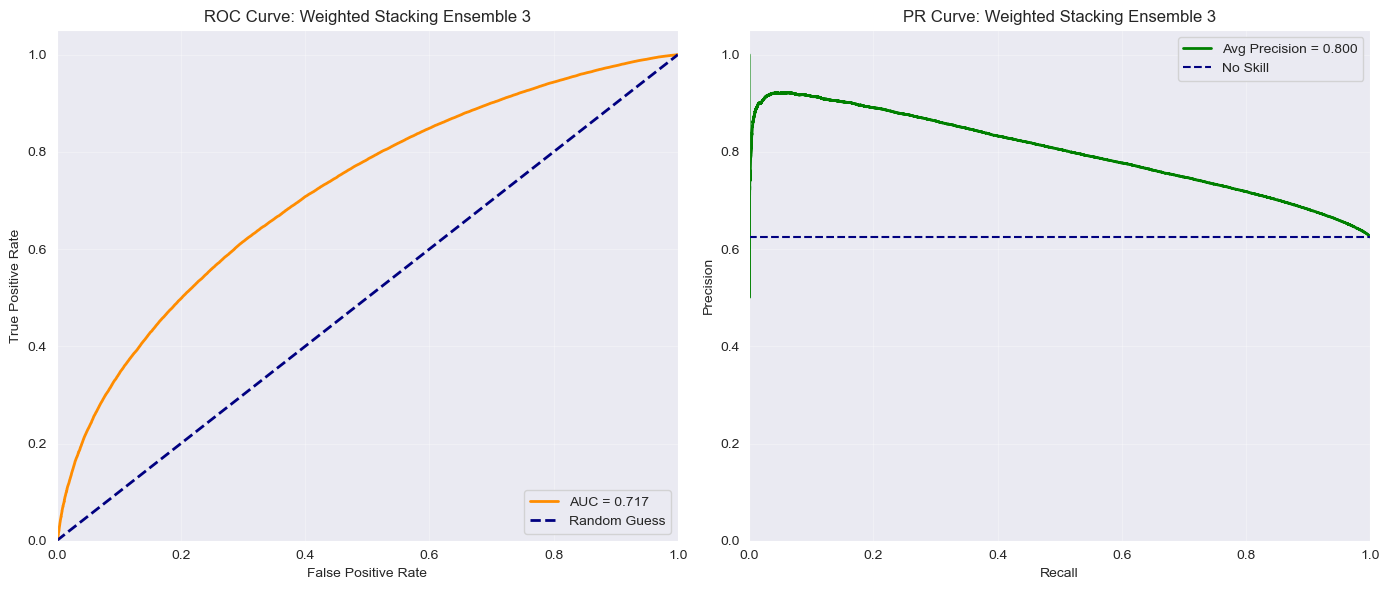

In [38]:
stack_weighted3 = WeightedStackingClassifier(
    estimators=estimators_stack3,
    final_estimator=LogisticRegression(max_iter=3000),
    weights=weights_stack3,
    cv=cv,
    n_jobs=-1,
    passthrough=False
)

results.append(
    evaluate_and_graph(stack_weighted3, X_train, y_train, X_test, y_test, "Weighted Stacking Ensemble 3", True, False)
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

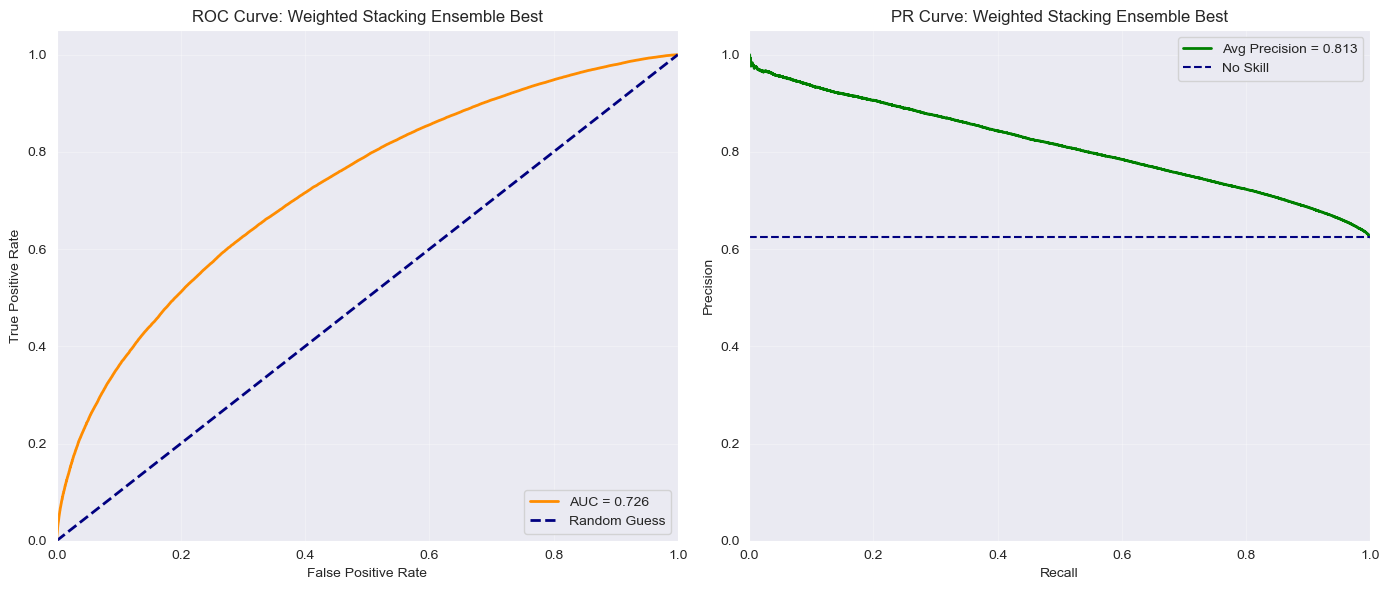

In [41]:
stack_weighted_best = WeightedStackingClassifier(
    estimators=estimators_best,
    final_estimator=LogisticRegression(max_iter=3000),
    weights=weights_best,
    cv=cv,
    n_jobs=-1,
    passthrough=False
)

results.append(
    evaluate_and_graph(stack_weighted_best, X_train, y_train, X_test, y_test, "Weighted Stacking Ensemble Best", True, False)
)

Fitting lgbm_tuned...
Fitting cat_tuned...
Fitting lgbm2...
Fitting cat2...
Fitting xgb2...
Fitting gb_tuned...
Fitting lgbm...
Fitting xgb...
Fitting cat...
Fitting lr...
--- Weighted Blender Ensemble ---
Train Accuracy: 0.6829 | Train AUC: 0.7517
Test  Accuracy: 0.6562 | Test  AUC: 0.7265
✅ Model seems balanced
------------------------------


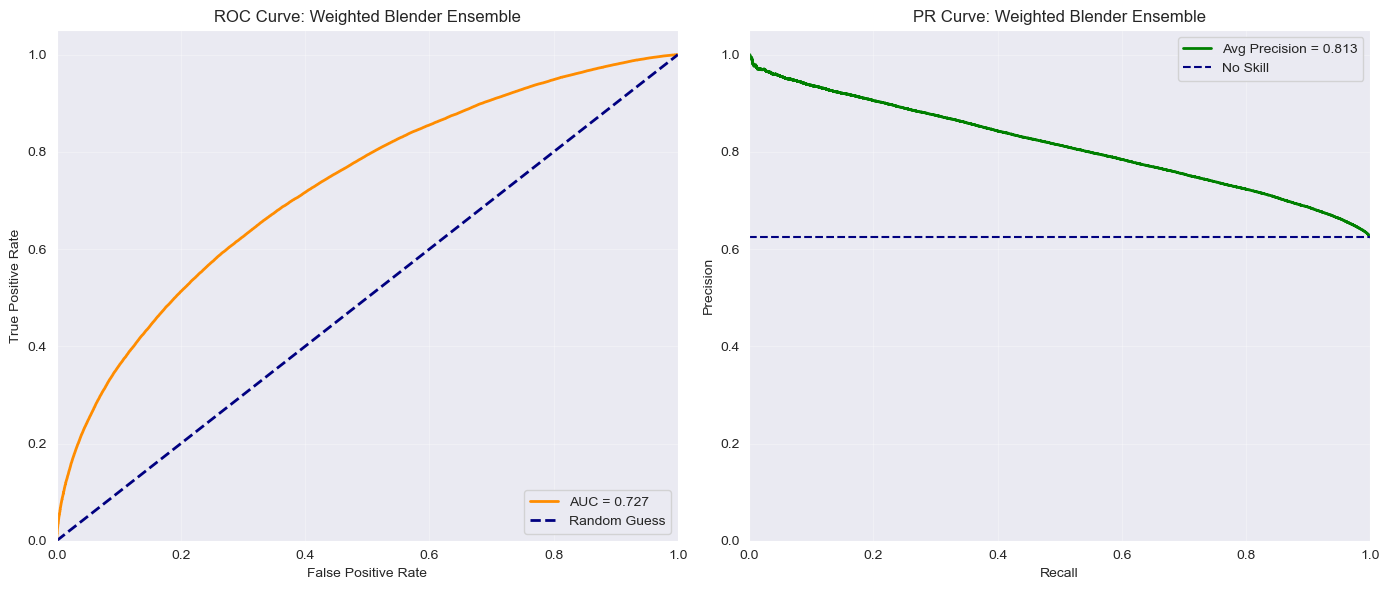

In [43]:
from sklearn.utils.validation import check_is_fitted

weights_blend = {
    "lgbm_tuned": 1.0,
    "cat_tuned": 3.0,
    "lgbm2": 5.0,
    "cat2": 0.75,
    "xgb2": 0.25,
    "gb_tuned": 1.0,
    "lgbm": 0.25,
    "xgb": 0.25,
    "cat": .25,
    "lr": 1.0
}

estimators_blend = [
    ("lgbm_tuned", best_lgbm),
    ("cat_tuned", best_cat),
    ("lgbm2", lgbm2),
    ("cat2", cat2),
    ("xgb2", xgb2),
    ("gb_tuned", tuned_gb),
    ("lgbm", lgbm),
    ("xgb", xgb),
    ("cat", cat),
    ("lr", lr),
]

class WeightedBlender(BaseEstimator, ClassifierMixin):
    def __init__(self, estimators, weights=None):
        self.estimators = estimators
        self.weights = weights

    def fit(self, X, y):
        self.fitted_estimators_ = []
        self.names_ = []
        for name, est in self.estimators:
            print(f"Fitting {name}...")
            fitted_est = clone(est).fit(X, y)
            self.fitted_estimators_.append(fitted_est)
            self.names_.append(name)

        self.classes_ = self.fitted_estimators_[0].classes_
        return self

    def predict_proba(self, X):
        check_is_fitted(self)

        all_probas = []

        total_weight = sum(self.weights.get(name, 1.0) for name in self.names_)

        for name, est in zip(self.names_, self.fitted_estimators_):
            weight = self.weights.get(name, 1.0)
            all_probas.append(est.predict_proba(X) * (weight / total_weight))

        return np.sum(all_probas, axis=0)

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

blender = WeightedBlender(estimators=estimators_blend, weights=weights_blend)

results.append(
    evaluate_and_graph(blender, X_train, y_train, X_test, y_test, "Weighted Blender Ensemble", True, False)
)

Fitting lgbm2...
Fitting cat_tuned...
Fitting xgb2...
Fitting gb_tuned...
Fitting cat2...
Fitting lr...
--- Weighted Blender Ensemble Best ---
Train Accuracy: 0.6831 | Train AUC: 0.7522
Test  Accuracy: 0.6563 | Test  AUC: 0.7266
✅ Model seems balanced
------------------------------


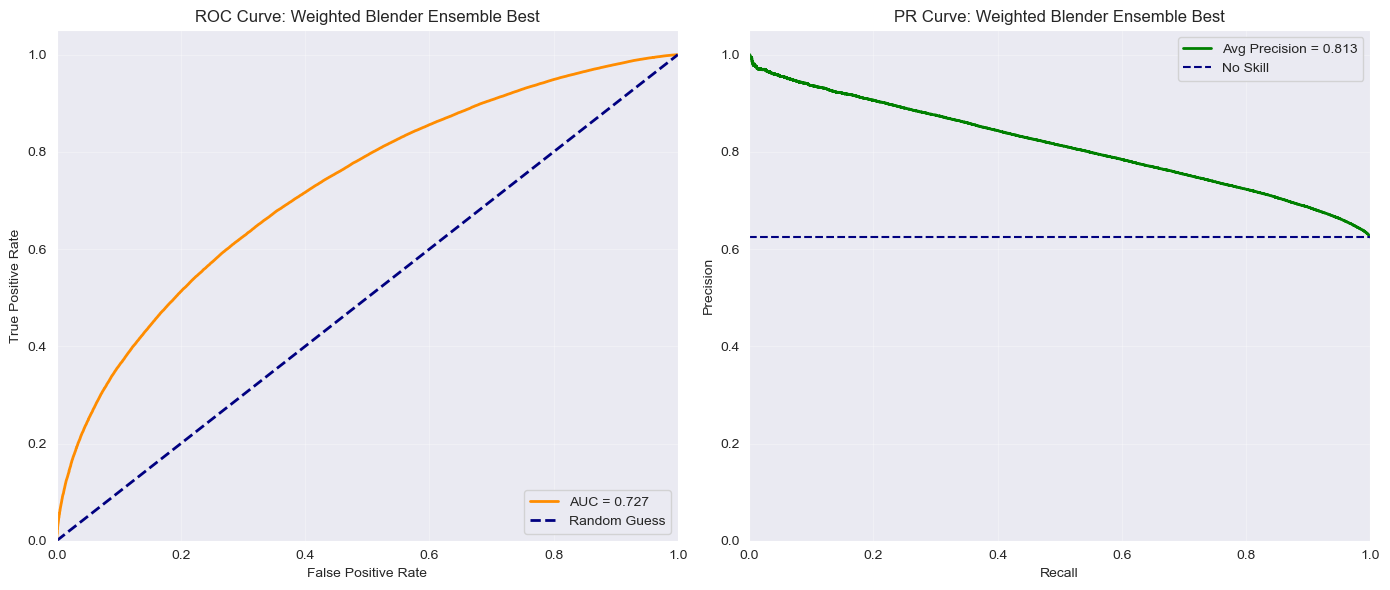

In [44]:
blender_best = WeightedBlender(estimators=estimators_best, weights=weights_best)

results.append(
    evaluate_and_graph(blender_best, X_train, y_train, X_test, y_test, "Weighted Blender Ensemble Best", True, False)
)

## Referenced Cat Boost Code

I looked at this notebook and made a couple of changes to improve the predictions

https://www.kaggle.com/code/krrishkumarkk/0-700-catboost-kfold-feature-best-output


Training seed: 42
Fold 1 AUC: 0.8010
Fold 2 AUC: 0.8010
Fold 3 AUC: 0.8007
Fold 4 AUC: 0.8006
Fold 5 AUC: 0.8026
Seed 42 mean AUC: 0.80118

Training seed: 52
Fold 1 AUC: 0.8026
Fold 2 AUC: 0.8012
Fold 3 AUC: 0.8003
Fold 4 AUC: 0.8031
Fold 5 AUC: 0.7992
Seed 52 mean AUC: 0.80127

Training seed: 62
Fold 1 AUC: 0.8019
Fold 2 AUC: 0.8024
Fold 3 AUC: 0.8006
Fold 4 AUC: 0.8015
Fold 5 AUC: 0.7995
Seed 62 mean AUC: 0.80118
--- Referenced CatBoost Ensemble ---
Train Accuracy: 0.8115 | Train AUC: 0.8952
Test  Accuracy: 0.6651 | Test  AUC: 0.7202
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


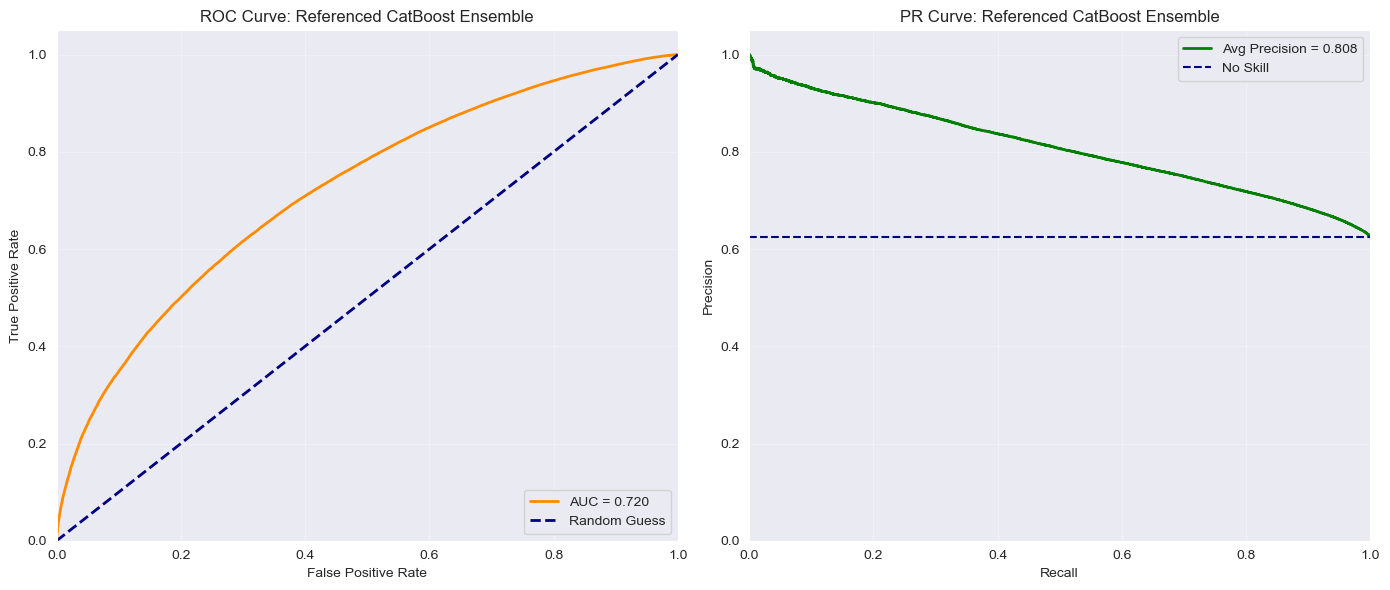

In [26]:
from catboost import Pool

class CatBoostEnsemble:
    def __init__(self, models):
        self.models = models

    def predict_proba(self, X):
        all_preds = np.array([model.predict_proba(X)[:, 1] for model in self.models])
        avg_preds = np.mean(all_preds, axis=0)
        return np.vstack([1 - avg_preds, avg_preds]).T

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] >= 0.5).astype(int)

TARGET = "diagnosed_diabetes"
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

cat_params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "iterations": 5000,
    "learning_rate": 0.04,
    "depth": 9,
    "l2_leaf_reg": 10,
    "random_strength": 1.0,
    "bootstrap_type": "Bayesian",
    "bagging_temperature": 1.2,
    "min_data_in_leaf": 50,
    "od_type": "Iter",
    "od_wait": 100,
    "verbose": 0
}

SEEDS = [42, 52, 62]
N_SPLITS = 5

all_trained_models = []

for seed in SEEDS:
    print(f"\nTraining seed: {seed}")

    skf = StratifiedKFold(
        n_splits=N_SPLITS,
        shuffle=True,
        random_state=seed
    )

    fold_scores = []

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        train_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
        val_pool = Pool(X_val, y_val, cat_features=cat_cols)

        model = CatBoostClassifier(
            **cat_params,
            random_seed=seed
        )

        model.fit(
            train_pool,
            eval_set=val_pool,
            use_best_model=True
        )

        all_trained_models.append(model)

        val_pred = model.predict_proba(val_pool)[:, 1]
        auc = roc_auc_score(y_val, val_pred)
        fold_scores.append(auc)
        print(f"Fold {fold+1} AUC: {auc:.4f}")

    print(f"Seed {seed} mean AUC: {np.mean(fold_scores):.5f}")

referenced_ensemble_model = CatBoostEnsemble(all_trained_models)

results.append(
    evaluate_and_graph(referenced_ensemble_model, X_train, y_train, X_test, y_test, "Referenced CatBoost Ensemble", True, True)
)

# Results

In [51]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 19
Valid Models: 15
Disqualified Models: 4

⚠️ The following models were disqualified due to overfitting:


model  accuracy       auc  train_auc  \
4               XGBoost (Optuna)  0.660014  0.723800   0.812667   
11  Referenced CatBoost Ensemble  0.665071  0.720217   0.895172   
14  Weighted Stacking Ensemble 3  0.640914  0.717060   0.838416   
18   Gradient Boosting 2 (Tuned)  0.656981  0.723141   0.792828   

    overfitting_gap  
4          0.088867  
11         0.174955  
14         0.121356  
18         0.069687

Best by Accuracy:


model  accuracy       auc  average_precision  train_accuracy  \
7  LightGBM (Optuna)  0.659252  0.726037           0.812449        0.699668   

   train_auc  overfitting_gap  is_overfit  
7   0.772267          0.04623       False

Best by AUC:


model  accuracy       auc  average_precision  train_accuracy  \
6  LightGBM 2  0.658571  0.727287           0.813546        0.686476   

   train_auc  overfitting_gap  is_overfit  
6   0.755958         0.028671       False

Best by Average Precision:


model  accuracy       auc  average_precision  train_accuracy  \
6  LightGBM 2  0.658571  0.727287           0.813546        0.686476   

   train_auc  overfitting_gap  is_overfit  
6   0.755958         0.028671       False


Final ranking (higher = better):


model  accuracy       auc  average_precision  \
6                        LightGBM 2  0.658571  0.727287           0.813546   
17   Weighted Blender Ensemble Best  0.656252  0.726568           0.813208   
16        Weighted Blender Ensemble  0.656200  0.726549           0.813139   
15  Weighted Stacking Ensemble Best  0.625000  0.726155           0.812731   
7                 LightGBM (Optuna)  0.659252  0.726037           0.812449   
10                 CatBoost (Tuned)  0.655657  0.725100           0.812124   
9                        CatBoost 2  0.653205  0.724728           0.812142   
3                         XGBoost 2  0.655471  0.724588           0.811609   
12       Weighted Stacking Ensemble  0.599829  0.717855           0.802087   
13     Weighted Stacking Ensemble 2  0.599829  0.717855           0.802087   
1         Gradient Boosting (Tuned)  0.642224  0.712208           0.802657   
5                          LightGBM  0.641700  0.712076           0.802616   
2                           XGBoost  0.641624  0.711794           0.802234   
8                          CatBoost  0.633586  0.703829           0.797641   
0               Logistic Regression  0.628548  0.695317           0.791999   

    overfitting_gap  
6          0.028671  
17         0.025626  
16         0.025143  
15         0.037691  
7          0.046230  
10         0.025190  
9          0.008284  
3          0.036388  
12         0.044739  
13         0.044739  
1          0.012077  
5          0.007449  
2          0.011036  
8          0.002022  
0          0.000744


🏆 Best model: LightGBM 2


# Submission for Kaggle

Manual Process, must use results to correctly call the best model

In [47]:
testing_scaled_num = scaler.transform(testing[vars_dict["true_numerical_vars"]])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=testing.index
)

testing_dummies = pd.get_dummies(testing[vars_dict["true_categorical_vars"]], drop_first=True)

_, testing_encoded_aligned = X_train_encoded.align(
    testing_dummies,
    join='left',
    axis=1,
    fill_value=0
)

testing_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {testing_scaled_df.shape}")
print(f"Testing shape:  {testing_final.shape}")

Training shape: (300000, 15)
Testing shape:  (300000, 36)


In [49]:
predictions = blender_best.predict_proba(testing_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'diagnosed_diabetes': predictions
})

submission.to_csv('blender_best_ensemble_gradient_boosting.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


id  diagnosed_diabetes
0  700000            0.381304
1  700001            0.559425
2  700002            0.671049
3  700003            0.299951
4  700004            0.879530